# 영문 분석 -> 워드 클라우드로 그리기(시각화)

## 샘플 데이터 영문 학술 문서의 제목만 추출, 그 단어의 빈도 분석 시각화 
## 데이터 수집 : Big data 키워드로 검색 후, 해당 학술 연구 정보 서비스에서 수집 해보기. 
## 조합, pandas.concat(), 정제 re 정규식, 기본적인 유효성 체크. 
## 변환 : word_tokenize(), lower(), 
## matplotlib.pyplot 이용하기. 
## 단어 빈도 구해주는 Counter() 이용. 

## 비정형 빅데이터 분석을 말하고 -> 자연어 처리 (nature language processing )
## 자연어 처리 예) 음성, 텍스트 정보 추출. 

## 단어 빈도를 추출해서, 해당 단어 시각화하기.

# 관련 단어 용어 정리 
## 텍스트 분석: 자연어 처리와 데이터 마이닝 결합하여 발전되었고, 
## 비정형 텍스트 데이터에서 정보를 추출하는 분석 방법. 
## 분석 방법 : 1) 텍스트 분류 2) 텍스트 군집화 3) 감성 분석. 

## 전처리 : 분석 작업의 정확도를 높이기 위해서 사용할 데이터 정리하고 변환하는 작업. 
### 수행하는 작업 
### 정제 (cleaning): 불필요한 기호, 문자 필터하는 작업, 정규식을 이용해서 작업을 함. 
### 정규화 ( normallization) : 형태가 다른 단어를 특정의 형태로 변환 작업 , 대문자, 소문자 통합 하는 작업, 의미가 비슷한 단어끼리 통합작업. 
### 토큰화 (tokenization) : 토큰으로 정하는 기본 단위로 분리 작업. 문장 기준, 단어 기준이 될수 도 있다. 
### 불용어제거(stopword) : 의미 있는 단어를 추출하기 위해서, 조사, 관사, 접미사, 접두사 등. 제거하는 작업. 
### 어간 추출(semming) : 단수, 복수, 진행형(시제), 분리하는 작업 
### 표제어 추출(lemmatization ): 단어의 기본형 형태로 일반화 하는 작업. 
### 예) 
### Gone -> go 
### am -> be
### going -> go 

## 워드클라우드 : 텍스트 분석에서 빈도를 시각화 할 때 많이 사용됨. 



# 데이터 수집 
# 한국교육학술정보원 (KERIS)의 RISS 사이트 
# https://www.riss.kr/index.do
# Big data 검색해보기.
# 한 페이지당 100개씩 내보내기 엑셀 파일 간략 정보 , 반복 10번 
# 1000개의 데이터에서 제목만 추출 및 분류 작업하기. 




# 데이터 준비 작업. 
# 제목 컬럼 빈도 분석 해보기. 


In [1]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# !pip install nltk


In [2]:
import nltk
# nltk.download()

In [3]:
# 관련 패키지들 임포트 하기. 
import pandas as pd 
# 경로 이름 지정해서 파일 처리할 때 사용하는 도구
import glob 
# 정규 표현식에 사용하는 도구 
import re 
# 2차원 리스트를 -> 1차원 리스트로 차원 축소시 사용하는 도구 
from functools import reduce
# 자연어 처리 패키지 중에서, 단어 토큰화 작업.
from nltk.tokenize import word_tokenize
# 불용어 처리 작업. 
from nltk.corpus import stopwords 
# 표제어 추출 
from nltk.stem import WordNetLemmatizer 
# 단어의 빈도를 추출하는 도구. 
from collections import Counter 
import matplotlib.pyplot as plt
# 단어의 빈도수를 시각화하는 도구, 빈도가 높을수록 글자 크기가 커짐. 
from wordcloud import STOPWORDS, WordCloud 


In [5]:
# 데이터 조합(병합)하기. 
# 현재 폴더 내부에 있는 , 받았던 엑셀 파일명 10개를 선택하기. 
all_files = glob.glob("./myCabinetExcelData*.xls")
all_files

# 엑셀 파일 읽어서 -> 데이터 프레임 (표형태) 변환 ->특정 리스트에 담아두기 
# 임시로 저장할 리스트 변수 
all_files_data = []

# all_files 에 담겨진 엑셀 파일의 위치가 들어있고, 
# 해당 위치의 엑셀 파일을 읽어서, 데이터 프레임 표 형태로 변환하기. 
# 임시 리스트에 담기. 
for file in all_files:
  # 해당 엑셀 파일의 위치의 물리 파일 읽기
  data_frame = pd.read_excel(file)
  # 임시 리스트에 담기. 
  all_files_data.append(data_frame)

# 샘플 확인 해보기., 첫번째 요소 확인 해보기. 
# all_files_data = [엑셀1,엑셀2,엑셀3,...엑셀10]
all_files_data[0]

# 오류 발생, 모듈 미설치 : xlrd
# cmd -> pip install xlrd 

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,A Big Data Guide to Understanding Climate Chan...,unknown,Mary Ann Leibert,2014
1,NaN,2,"Deep Learning on Big, Sparse, Behavioral Data","De Cnudde, Sofie; Ramon, Yanou; Martens, David...",Mary Ann Leibert,2019
2,NaN,3,Call for Papers: Special Issue on Computationa...,unknown,Mary Ann Leibert,2017
3,NaN,4,A new big data approach based on geoecological...,"Varotsos, Costas A.; Krapivin, Vladimir F.",John Wiley & Sons Ltd,2017
4,NaN,5,Combining Human Computing and Machine Learning...,unknown,Mary Ann Leibert,2016
...,...,...,...,...,...,...
95,NaN,96,HDM: A Composable Framework for Big Data Proce...,"Wu, D.; Zhu, L.; Lu, Q.; Sakr, S.",unknown,2018
96,NaN,97,A Multi-Branch Decoder Network Approach to Ada...,"Zhang, Yang",unknown,2022
97,NaN,98,AlgorithmSeer: A System for Extracting and Sea...,"Tuarob, S.; Bhatia, S.; Mitra, P.; Giles, C. L.",unknown,2016
98,NaN,99,Hybridisation of classifiers for anomaly detec...,"Alguliyev, Rasim M.; Aliguliyev, Ramiz M.; Abd...",Inderscience,2019


In [6]:
# 엑셀 파일 10개를 병합해서 출력해보기. 
# axis=0 , 세로 방향으로 , 밑으로 데이터를 붙이는 작업. 
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
print(f"all_files_data_concat.shape : {all_files_data_concat.shape}")

# 병합된 파일을 csv 파일로 변환하기. 
all_files_data_concat.to_csv("./riss_Bigdata.csv", encoding="utf-8", index=False)


all_files_data_concat.shape : (1000, 6)


In [7]:
# 전처리 작업 하기. 
# 데이터 프레임에서 제목 열만 추출 
all_title = all_files_data_concat["제목"]
all_title

#불용어 제거 
# set(), 기본적으로 중복 제거 
stopWords = set(stopwords.words("english"))

# lemma 작업 -> 표제어 추출, 영어, 시제를 제거하고, 원형(사전식 단어 추출)
lemma = WordNetLemmatizer()

In [26]:
# 임시로 담을 변수, 
words = []

# 기본적인 , 단어 추출(전처리 작업.)
for title in all_title:
  # 영문자, 대 소문자를 제외한 나머지 문자는 모두 공백으로 처리하겠다. 
  print(f"과정1 title 원본: {title}")
  enWords = re.sub(r"[^a-zA-Z]+"," ",str(title))
  print(f"과정2 title enWords(re: 대소문자 남기기): {enWords}")
  # 남은 영문자를 -> 모두 소문자 변환하고 -> 각단어를 토큰(조각)으로 각각 분리 작업. 
  enWordsToken = word_tokenize(enWords.lower())
  print(f"과정3 title enWordsToken(모두 소문자 -> 각각 분리 토큰화): {enWordsToken}")
  # 컴프리헨션 파이썬 스타일 코드로 , 리스트로 변경하기. 
  
  # 불용어 제거 작업, 조사, 관사 등 제거하는 작업. -> 오타:stopwords -> stopWords
  # (w가 stopwords아닌 경우 enWordsToken 내의 w를 반복해서 추출)
  enWordsTokenStop= [w for w in enWordsToken if w not in stopWords]
  print(f"과정4 title enWordsTokenStop(불용어 제거): {enWordsToken}")

  # 표제어 추출 작업. 
  enWordsTokenStopLemma = [lemma.lemmatize(w) for w in enWordsTokenStop]
  print(f"과정5 title enWordsTokenStopLemma(표제어 추출 작업 후): {enWordsTokenStopLemma}")

  words.append(enWordsTokenStopLemma)
  
print(f"words(전처리, re 정규식, token화, stop 불용어 제거, 표제어 추출) : {words}")

과정1 title 원본: A Big Data Guide to Understanding Climate Change: The Case for Theory-Guided Data Science
과정2 title enWords(re: 대소문자 남기기): A Big Data Guide to Understanding Climate Change The Case for Theory Guided Data Science
과정3 title enWordsToken(모두 소문자 -> 각각 분리 토큰화): ['a', 'big', 'data', 'guide', 'to', 'understanding', 'climate', 'change', 'the', 'case', 'for', 'theory', 'guided', 'data', 'science']
과정4 title enWordsTokenStop(불용어 제거): ['a', 'big', 'data', 'guide', 'to', 'understanding', 'climate', 'change', 'the', 'case', 'for', 'theory', 'guided', 'data', 'science']
과정5 title enWordsTokenStopLemma(표제어 추출 작업 후): ['big', 'data', 'guide', 'understanding', 'climate', 'change', 'case', 'theory', 'guided', 'data', 'science']
과정1 title 원본: Deep Learning on Big, Sparse, Behavioral Data
과정2 title enWords(re: 대소문자 남기기): Deep Learning on Big Sparse Behavioral Data
과정3 title enWordsToken(모두 소문자 -> 각각 분리 토큰화): ['deep', 'learning', 'on', 'big', 'sparse', 'behavioral', 'data']
과정4 title enWordsTo

In [11]:
# 2차원 리스트 -> 1차원 리스트, 차원 축소
# reduce 함수 이용하기. 차원 축소
# list 함수 이용해서, 1차원 리스트로 만들기.
result = reduce(lambda x,y : x+y, words)
words2 = list(result)
# result
print(f"result 타입 조사 : {type(words2)}")
print(f"words2 : {words2}")

result 타입 조사 : <class 'list'>
words2 : ['big', 'data', 'guide', 'understanding', 'climate', 'change', 'case', 'theory', 'guided', 'data', 'science', 'deep', 'learning', 'big', 'sparse', 'behavioral', 'data', 'call', 'paper', 'special', 'issue', 'computational', 'propaganda', 'political', 'big', 'data', 'new', 'big', 'data', 'approach', 'based', 'geoecological', 'information', 'modeling', 'system', 'combining', 'human', 'computing', 'machine', 'learning', 'make', 'sense', 'big', 'aerial', 'data', 'disaster', 'response', 'call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering', 'earth', 'observation', 'geospatial', 'big', 'data', 'management', 'engagement', 'stakeholder', 'hungary', 'support', 'sdgs', 'atmospheric', 'ecosystem', 'big', 'data', 'providing', 'key', 'contribution', 'reaching', 'united', 'nation', 'sustainable', 'development', 'goal', 'big', 'data', 'analytics', 'capability', 'digital', 'transformation', 'insurance', '

In [12]:
# 데이터 탐색, 기본 분석 모델 만들기.
# Counter -> 해당 단어 빈도 집계 해주는 함수.
count = Counter(words2)
count

Counter({'data': 1235,
         'big': 1113,
         'analytics': 110,
         'based': 102,
         'analysis': 93,
         'driven': 70,
         'system': 64,
         'using': 57,
         'approach': 55,
         'learning': 50,
         'issue': 49,
         'model': 46,
         'challenge': 43,
         'application': 41,
         'new': 40,
         'special': 38,
         'management': 35,
         'algorithm': 35,
         'science': 34,
         'framework': 34,
         'platform': 34,
         'call': 33,
         'paper': 32,
         'era': 32,
         'health': 31,
         'research': 30,
         'cloud': 30,
         'network': 29,
         'opportunity': 28,
         'technology': 28,
         'machine': 27,
         'processing': 26,
         'mining': 26,
         'computing': 25,
         'earth': 25,
         'perspective': 24,
         'optimization': 24,
         'smart': 24,
         'performance': 24,
         'distributed': 23,
         'method': 23,


In [37]:
# 임시 딕션너리 만들기. 
word_count = dict()

# 상위 50개 정도만 추출 해보기. 
for tag, counts in count.most_common(50):
  if(len(str(tag)) >1):
    word_count[tag] = counts
    # print(f"tag : {tag}, counts : {counts}")

word_count

{'data': 1235,
 'big': 1113,
 'analytics': 110,
 'based': 102,
 'analysis': 93,
 'driven': 70,
 'system': 64,
 'using': 57,
 'approach': 55,
 'learning': 50,
 'issue': 49,
 'model': 46,
 'challenge': 43,
 'application': 41,
 'new': 40,
 'special': 38,
 'management': 35,
 'algorithm': 35,
 'science': 34,
 'framework': 34,
 'platform': 34,
 'call': 33,
 'paper': 32,
 'era': 32,
 'health': 31,
 'research': 30,
 'cloud': 30,
 'network': 29,
 'opportunity': 28,
 'technology': 28,
 'machine': 27,
 'processing': 26,
 'mining': 26,
 'computing': 25,
 'earth': 25,
 'perspective': 24,
 'optimization': 24,
 'smart': 24,
 'performance': 24,
 'distributed': 23,
 'method': 23,
 'use': 23,
 'information': 22,
 'business': 22,
 'review': 22,
 'intelligence': 22,
 'service': 21,
 'process': 21,
 'world': 21,
 'development': 19}

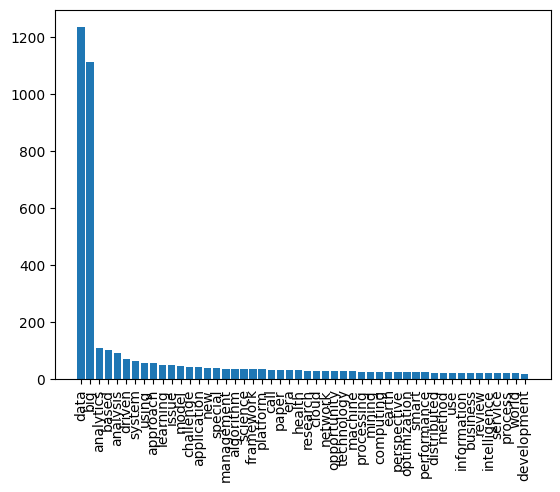

In [38]:
# 추출된 상위 50개 단어 시각화하기. 
# 막대그래프 
# word_count : 상위 50개 단어 추출한 , 딕션너리 = Map 비슷 ,key : value 
# 기본이 : 오름 차순, reverse, 내림 차순이라고 보면 됨. 
sorted_Keys = sorted(word_count, key = word_count.get, reverse=True)

# values 추출, 내림 차순 
sorted_Values= sorted(word_count.values(), reverse=True)

# 시각화 
# x축 : range(len(word_count))
# Y축 : sorted_Values
plt.bar(range(len(word_count)),sorted_Values, align='center')
# 눈금 옵션 조정. x축 라벨 붙이기 작업. rotation 세로 방향으로 기울이기. 
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = "vertical")

plt.show()

In [39]:
# 기존 데이터 프레임에 새로운 컬럼(doc_count) 추가, 임의로 0으로 값 넣기. 
all_files_data_concat["doc_count"] = 0

#  출판일 기준으로 그룹화해서, count 집계 표기 하기. 
summary_date = all_files_data_concat.groupby("출판일", as_index=False)["doc_count"].count()
summary_date

,출판일,doc_count
0,2003,1
1,2004,1
2,2011,5
3,2012,19
4,2013,49
5,2014,127
6,2015,91
7,2016,119
8,2017,131
9,2018,117


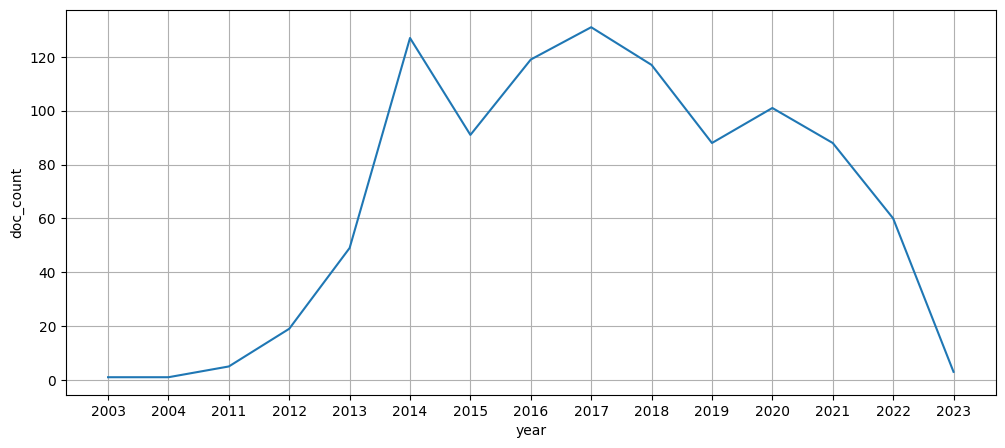

In [40]:
# 꺽은선 그래프 
# 가로 세로 비율
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc_count")
plt.grid(True)
# x축 : range(len(summary_date))
# y축 : summary_date["doc_count"]
plt.plot(range(len(summary_date)), summary_date["doc_count"] )
# x축 라벨링 옵션 
plt.xticks(range(len(summary_date)), [text for text in summary_date["출판일"]])
plt.show()

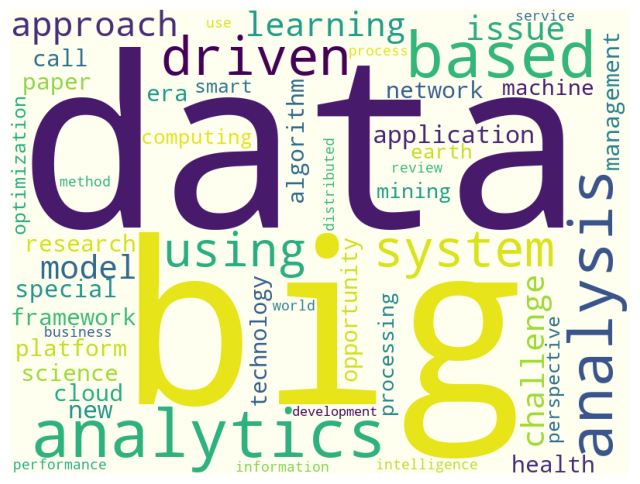

In [41]:
# 워드 클라우드 공식 문서 , 다양한 이미지 위에 처리하기. 
# https://amueller.github.io/word_cloud/index.html

# 워드 클라우드 시각화 
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="ivory", stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis("off")
plt.show()
# data': 1235,
#  'big': 1113,
#  'analytics': 110,
#  'based': 102,
#  'analysis': 93,
#  'driven': 70,
#  'system': 64,
#  'using': 57,